In [17]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [18]:
tickers = ['BIDI4.SA', 'ALPA4.SA', 'MGLU3.SA']

In [19]:
df = pd.DataFrame()
for t in tickers:
    df[t] = wb.DataReader(t, data_source='yahoo', start='2018-1-1')['Adj Close']

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 470 entries, 2018-05-02 to 2020-03-27
Data columns (total 3 columns):
BIDI4.SA    470 non-null float64
ALPA4.SA    470 non-null float64
MGLU3.SA    470 non-null float64
dtypes: float64(3)
memory usage: 14.7 KB


## Normalization

In [21]:
df.iloc[0]

BIDI4.SA    67.098152
ALPA4.SA    12.220500
MGLU3.SA    12.218285
Name: 2018-05-02 00:00:00, dtype: float64

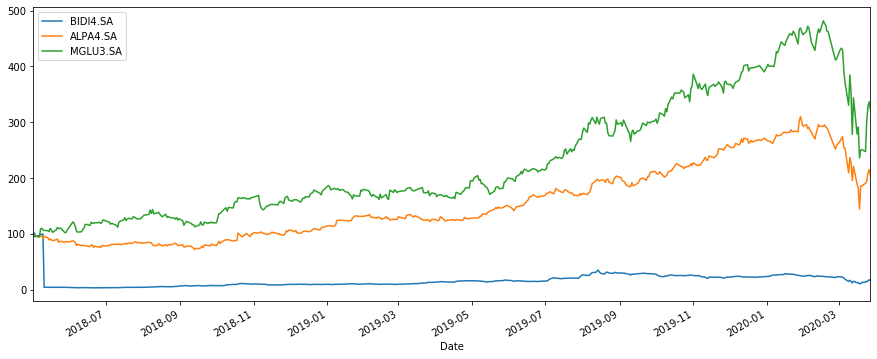

In [22]:
(df / df.iloc[0] * 100).plot(figsize=(15,6))
plt.show()

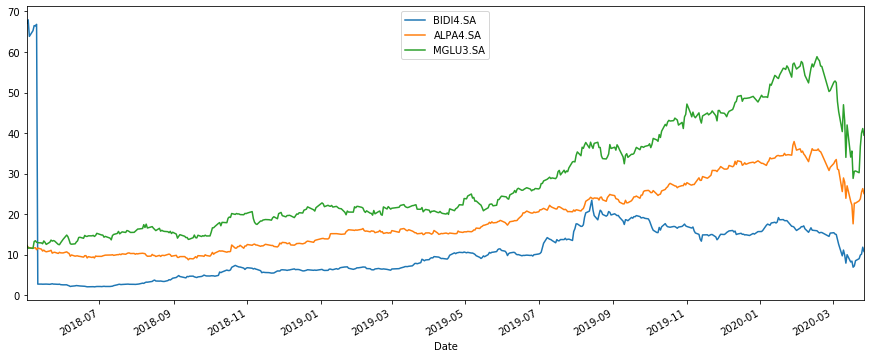

In [23]:
df.plot(figsize=(15,6))
plt.show()

## Search methods

In [24]:
df.loc['2019-12-30']
df.iloc[0]

BIDI4.SA    67.098152
ALPA4.SA    12.220500
MGLU3.SA    12.218285
Name: 2018-05-02 00:00:00, dtype: float64

## Simple Return

In [25]:
returns = (df/df.shift(1)) - 1
returns.head()

,BIDI4.SA,ALPA4.SA,MGLU3.SA
Date,,,
2018-05-02,NaN,NaN,NaN
2018-05-03,0.012709,-0.035370,-0.051707
2018-05-04,-0.060238,-0.006667,0.005144
2018-05-07,0.021929,-0.013423,-0.008704
2018-05-08,0.019257,0.008843,0.146000


In [26]:
weights = np.array([0.31,0.33,0.35])

In [27]:
np.dot(returns, weights)

array([            nan, -2.58298632e-02, -1.90732675e-02, -6.78089586e-04,
        5.99879336e-02,  6.31101049e-03, -2.17932267e-02, -2.88066282e-01,
       -8.57752160e-03, -2.17764313e-02,  2.78110182e-02, -1.72579269e-02,
       -1.69309222e-02,  1.55027884e-02,  2.61650565e-02, -1.98629388e-02,
       -2.22051259e-04, -1.66559100e-03, -3.69041177e-02,  1.23354900e-02,
       -5.39592800e-03,  1.69452259e-02,  3.63104684e-02, -3.39306083e-02,
       -3.77272521e-02, -6.77297885e-02,  1.58865380e-02,  5.15368773e-03,
        2.46285419e-02,  2.39688467e-03,  1.52984025e-02, -4.84146227e-03,
       -1.83202860e-02,  2.56640224e-02, -1.49473073e-02, -2.79166670e-02,
        1.63879053e-02, -6.15821378e-03,  9.74477382e-03, -2.16907732e-02,
        2.96180047e-02,  1.67113265e-02, -6.94561409e-03, -7.13261525e-03,
        1.05117116e-02, -4.52083543e-03,  1.43098411e-03, -9.47629949e-03,
       -5.22987484e-03,  3.47442871e-02,  2.04119524e-02,  3.78128125e-02,
        2.37351240e-02, -

In [28]:
annual_return = returns.mean() * 250
annual_return

BIDI4.SA    0.459338
ALPA4.SA    0.511727
MGLU3.SA    0.802117
dtype: float64

In [29]:
np.dot(annual_return, weights)

0.5920057984416365

In [30]:
portf_1 = '{}% ao ano'.format(round(np.dot(annual_return, weights),5) * 100)
portf_1

'59.201% ao ano'

In [31]:
weights_2 = np.array([0.35,0.31,0.33])

In [32]:
portf_2 = '{}% ao ano'.format(round(np.dot(annual_return, weights_2),5) * 100)
print(' pf1: {}\n pf2: {}'.format(portf_1,portf_2))

 pf1: 59.201% ao ano
 pf2: 58.41% ao ano
